In [1]:
import numpy as np
import pandas as pd


In [2]:
df_pooled_ranking = pd.read_csv("data/df_pooled_ranking.csv").set_index("nome")
df_pooled_ranking.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1646 entries, ALUNO-2 to ALUNO-1349
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ida                   1646 non-null   float64
 1   diff_fase             1646 non-null   float64
 2   ponto_virada_encoded  1646 non-null   int64  
 3   anos_pm               1646 non-null   float64
 4   bolsista_encoded      1646 non-null   int64  
 5   ipv                   1646 non-null   float64
 6   corraca               1646 non-null   object 
 7   ponto_virada          1646 non-null   object 
 8   ian                   1646 non-null   float64
 9   pedra                 1646 non-null   object 
 10  pedra_encoded         1646 non-null   int64  
 11  iaa                   1646 non-null   float64
 12  ips                   1646 non-null   float64
 13  ieg                   1646 non-null   float64
 14  ipp                   1646 non-null   float64
 15  idade         

In [14]:
features_cols = df_pooled_ranking.columns.difference(
    ["corraca", "ponto_virada", "pedra", "pedra_encoded", "sexo", "cf", "ct", "fase"]
)


df = df_pooled_ranking[features_cols]


# df.to_csv("data/df_pooled_ranking_clean.csv")


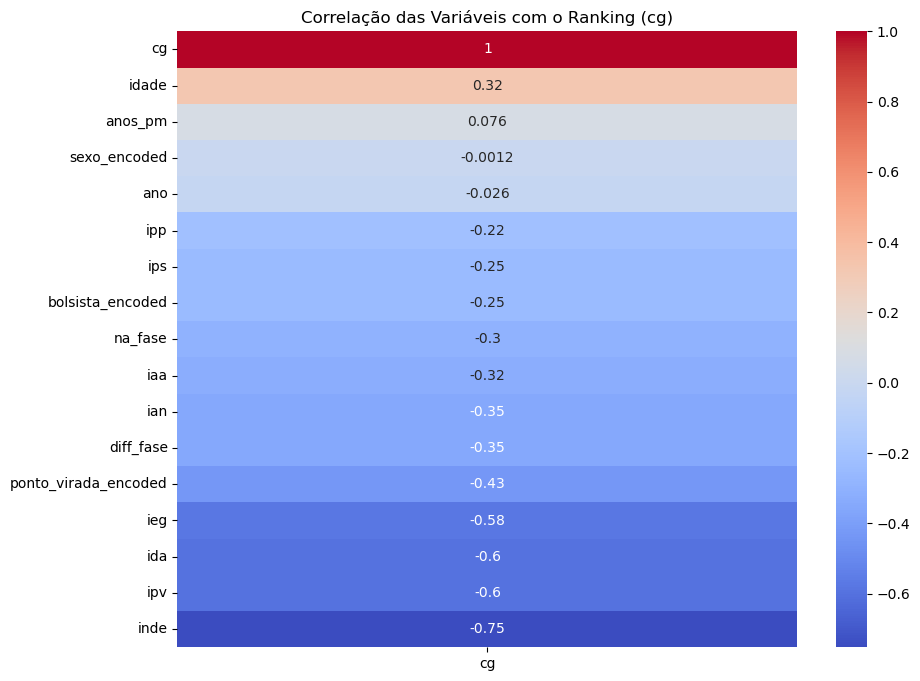

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir a coluna 'nome', que é o índice
df_clean = df

# Verificar as correlações das variáveis com a variável 'cg'
correlation_matrix = df_clean.corr()

# Plotar a matriz de correlação com foco na variável 'cg'
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix[["cg"]].sort_values(by="cg", ascending=False),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlação das Variáveis com o Ranking (cg)")
plt.show()


In [13]:
df.head()


,ano,anos_pm,bolsista_encoded,cg,diff_fase,iaa,ian,ida,idade,ieg,inde,ipp,ips,ipv,na_fase,ponto_virada_encoded,sexo_encoded
nome,,,,,,,,,,,,,,,,,
ALUNO-2,2022,0.0,0,245.0,-2.0,10.00002,5.0,8.816667,11.0,7.581705,7.675509,5.6250,7.500,7.916665,0,0,1.0
ALUNO-4,2020,2.0,0,451.0,-1.0,8.00002,5.0,0.000000,10.0,4.100000,5.076252,7.1875,6.875,7.750000,0,0,0.0
ALUNO-4,2022,0.0,0,451.0,-1.0,10.00002,5.0,5.083333,12.0,8.071429,7.117065,6.2500,7.500,8.055553,0,0,0.0
ALUNO-5,2020,1.0,0,415.0,0.0,7.50002,10.0,7.500000,10.0,8.000000,8.077085,8.4375,7.500,8.166665,1,0,0.0
ALUNO-5,2021,2.0,0,415.0,0.0,7.40000,10.0,5.400000,11.0,7.500000,7.399000,8.5000,7.500,7.400000,1,0,0.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tratar valores ausentes (se necessário)
df = df.dropna()

# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=["cg"])  # Exclui a coluna 'cg'
y = df["cg"]

# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Conversão da variável dependente para rótulos inteiros (ordinal)
y_train_ordinal = y_train.astype(int)
y_test_ordinal = y_test.astype(int)

# Ensure consecutive integer values in y_train
unique_values = sorted(y_train.unique())
mapping = {val: i for i, val in enumerate(unique_values)}
y_train_mapped = y_train.map(mapping)

# Treinar o modelo XGBoost
model_xgb = xgb.XGBClassifier(
    objective="multi:softprob", num_class=len(y_train_ordinal.unique())
)
model_xgb.fit(X_train_scaled, y_train_ordinal)


In [30]:
# Selecionar as features com base nas correlações e no entendimento dos dados
selected_features = [
    "anos_pm",
    "diff_fase",
    "iaa",
    "ipv",
    "ida",
    "ieg",
    "inde",
    "idade",
    "na_fase",
    "sexo_encoded",
    "ponto_virada_encoded",
]

# Separar as features e a variável target (cg)
X = df_clean[selected_features]
y = df_clean["cg"]

# Dividir os dados entre treino (anos 2020 e 2021) e teste (2022)
X_train = X[df_clean["ano"] < 2022]
y_train = y[df_clean["ano"] < 2022]
X_test = X[df_clean["ano"] == 2022]
y_test = y[df_clean["ano"] == 2022]

# Verificar as dimensões dos conjuntos de treino e teste
X_train.shape, X_test.shape


((784, 11), (862, 11))

In [ ]:
# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=["cg"])  # Exclui a coluna 'cg'
y = df["cg"]

# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb

# Converter o target para categorias
y_train_class = (
    y_train.astype(int) - 1
)  # Certifique-se que os valores são inteiros para classificação
y_test_class = y_test.astype(int) - 1


In [25]:
# Verificar se as classes foram ajustadas corretamente para o intervalo 0 a 861
print(
    f"Mínimo de y_train_class: {y_train_class.min()}, Máximo de y_train_class: {y_train_class.max()}"
)


Mínimo de y_train_class: 0, Máximo de y_train_class: 861


In [26]:
# Definir os parâmetros para o XGBoost em modo de classificação
params = {
    "objective": "multi:softprob",  # Multiclass classification
    "num_class": 862,  # Número de classes únicas em cg
    "max_depth": 4,
    "eta": 0.1,
    "eval_metric": "mlogloss",
}

# Treinar o modelo
dtrain_class = xgb.DMatrix(X_train, label=y_train_class)
dtest_class = xgb.DMatrix(X_test, label=y_test_class)
model_xgb_class = xgb.train(params, dtrain_class, num_boost_round=100)

# Previsões
y_pred_class = model_xgb_class.predict(dtest_class)
y_pred_labels = np.argmax(y_pred_class, axis=1)

# Remapeamos as previsões de volta ao intervalo original (1 a 862)
y_pred_final = y_pred_labels + 1

# Avaliar o modelo com acurácia
accuracy = accuracy_score(y_test_class, y_pred_labels)
print(f"Acurácia: {accuracy}")


Acurácia: 0.019721577726218097


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

# Codificar a variável target como ordinal
encoder = OrdinalEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Treinar um modelo de regressão logística
model_lr = LogisticRegression(multi_class="ovr")
model_lr.fit(X_train, y_train_encoded)

# Prever os resultados
y_pred_lr = model_lr.predict(X_test)

# Avaliar o desempenho
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
print(f"Acurácia da Regressão Logística: {accuracy_lr}")
